# Cystic Fibrosis 
* genetic disease
* Mutation on CFTR - Cl channel

## Read the file

In [65]:
cf <- read.csv("Data/cf.csv")

In [66]:
head(cf)
names(cf)

id,YRM,age,sex,fev1pct,pseudo,mssa,jedate,jlastdate,jddate,dflag1yr,dflag5yr,survdays,dflag
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
123462,2010,10,0,91.20,0,0,18508,20453,NA,0,0,1945,0
123462,2011,11,0,88.32,0,0,18704,20453,NA,0,0,1749,0
123462,2012,12,0,87.89,0,1,19019,20453,NA,0,0,1434,0
123462,2013,13,0,92.94,0,1,19446,20453,NA,0,0,1007,0
123462,2014,14,0,85.19,0,1,19782,20453,NA,0,0,671,0
123462,2015,15,0,72.92,0,0,20189,20453,NA,0,0,264,0


[1] "id"        "YRM"       "age"       "sex"       "fev1pct"   "pseudo"   
 [7] "mssa"      "jedate"    "jlastdate" "jddate"    "dflag1yr"  "dflag5yr" 
[13] "survdays"  "dflag"

## Drawing survival graphs

In [67]:
install.packages("survival", repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [68]:
library(survival)

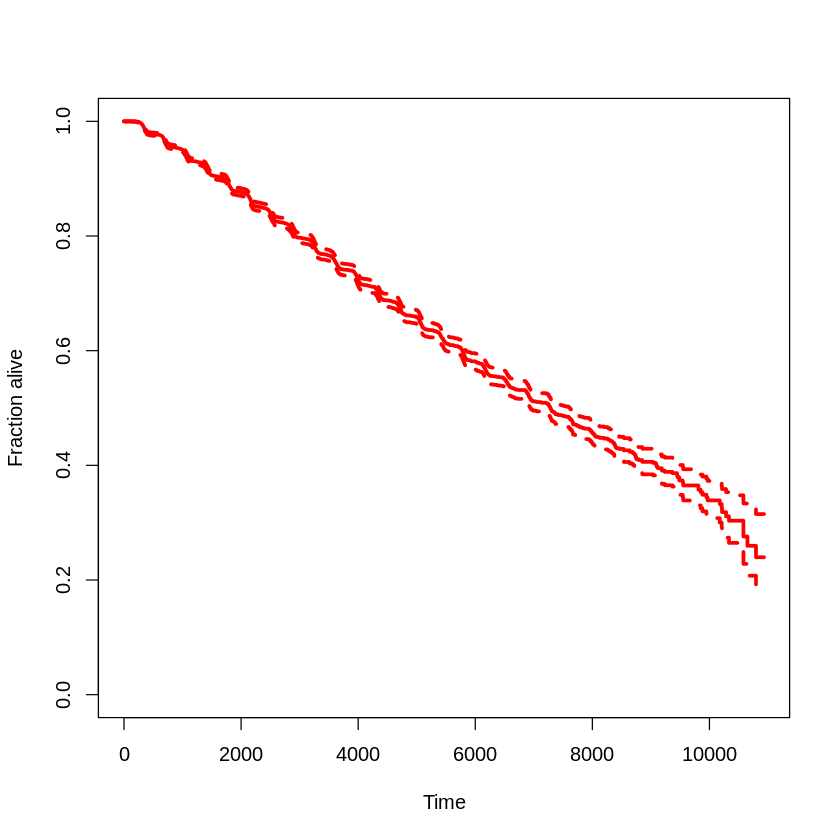

In [69]:
plot(survfit(Surv(survdays,dflag) ~1, cf), lwd=3, col="red", xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
## The ~ says to treat this survivorship as a function of nothing.
## The ,cf says to use that data.

The Surv function takes the number of days until the last visit and combines that with whether that visit was a death or not, and finds the fraction of peiple alive

## Read file with jus the first measurement for each 

In [70]:
cffirst <- read.csv("Data/cffirst.csv")
head(cffirst)

id,YRM,age,sex,fev1pct,pseudo,mssa,jedate,jlastdate,jddate,dflag1yr,dflag5yr,survdays,dflag
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
123462,2010,10.0,0,91.20,0,0,18508,20453,NA,0,0,1945,0
123518,2005,6.4,0,115.50,1,0,16663,20453,NA,0,0,3790,0
123550,1994,14.0,0,86.59,0,0,12441,18992,18762,0,0,6551,1
123552,2003,6.9,0,88.93,1,1,15714,20453,NA,0,0,4739,0
123597,1993,54.0,1,60.91,0,1,12085,18992,18842,0,0,6907,1
123605,2008,7.3,0,154.70,1,1,17604,20453,NA,0,0,2849,0


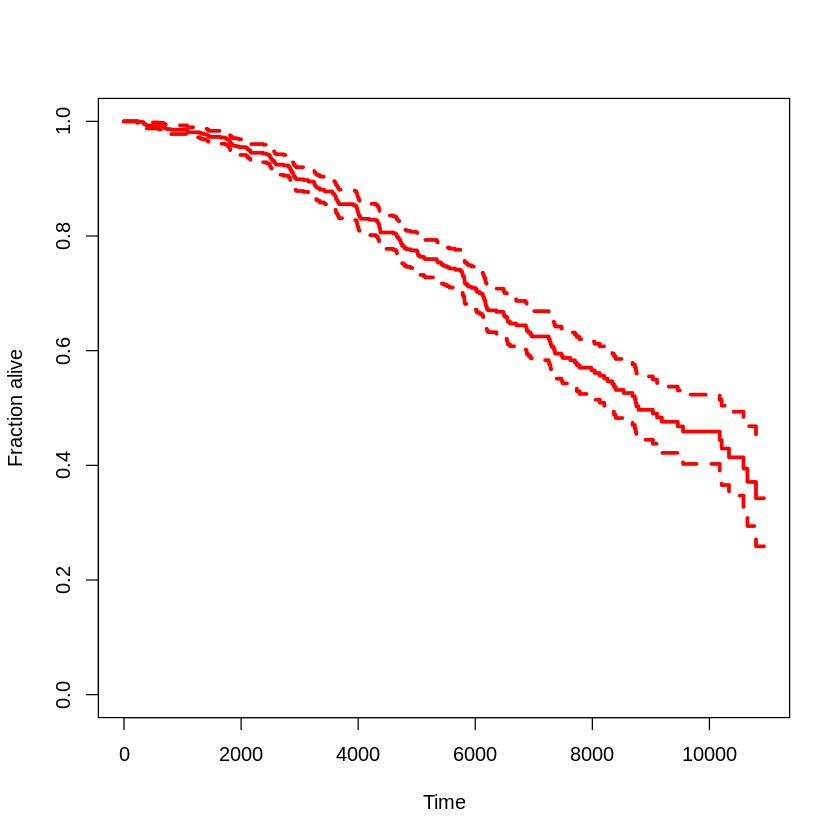

In [71]:
plot(survfit(Surv(survdays,dflag) ~1, cffirst), lwd=3, col="red", xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
## The ~ says to treat this survivorship as a function of nothing.
## The ,cffirst says to use that data.

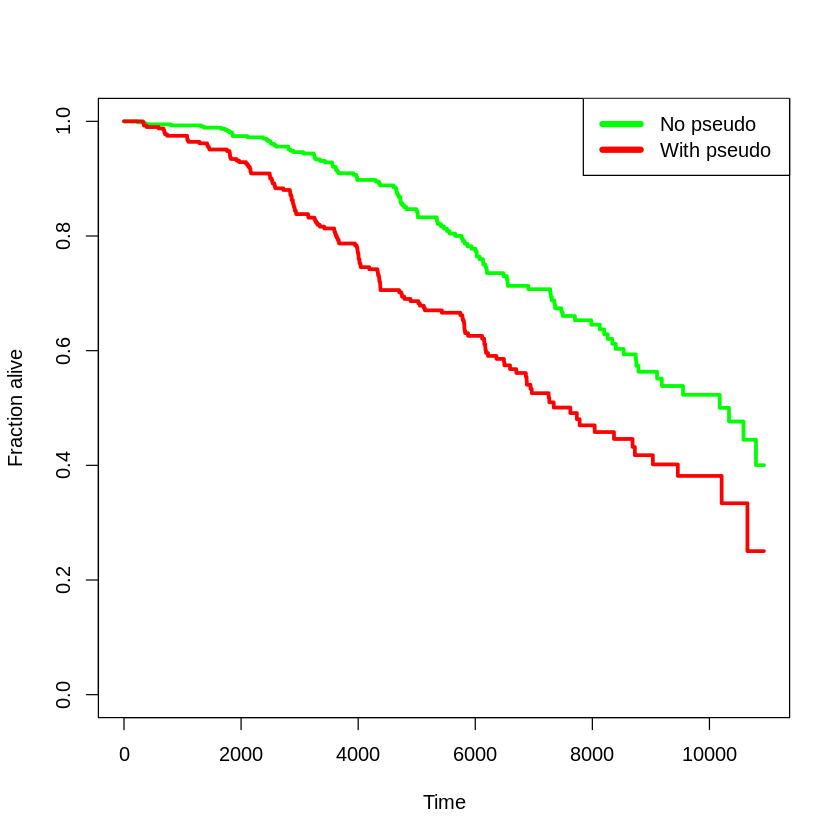

In [72]:
plot(survfit(Surv(survdays,dflag) ~ pseudo, cffirst), lwd=3, col=c("green", "red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
legend("topright",c("No pseudo","With pseudo"), lwd=5, col = c("green", "red"))

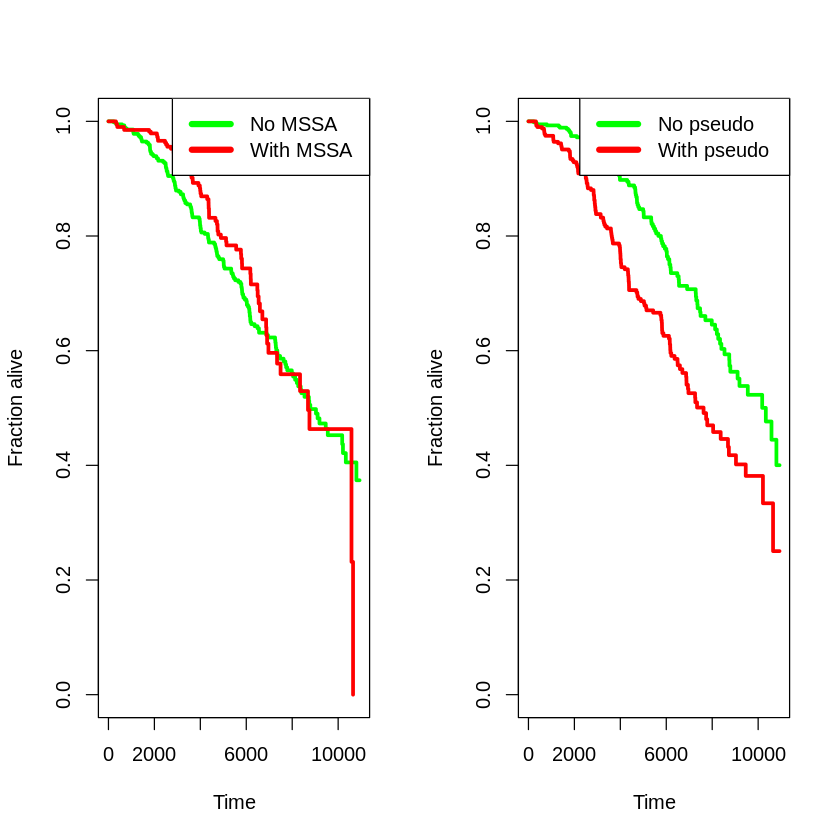

In [73]:
par(mfrow=c(1,2))
plot(survfit(Surv(survdays,dflag) ~ mssa, cffirst), lwd=3, col=c("green", "red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
legend("topright",c("No MSSA","With MSSA"), lwd=5, col = c("green", "red"))

plot(survfit(Surv(survdays,dflag) ~ pseudo, cffirst), lwd=3, col=c("green", "red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
legend("topright",c("No pseudo","With pseudo"), lwd=5, col = c("green", "red"))

## Make a mini file with the first 20 patients to practice


In [74]:
minicf <- cffirst[1:20,] 
# This says take rows from 1 to 20.
minicf[order(minicf$survdays),]

,id,YRM,age,sex,fev1pct,pseudo,mssa,jedate,jlastdate,jddate,dflag1yr,dflag5yr,survdays,dflag
,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
15,124092,2015,5.4,1,128.80,0,1,20171,20453,NA,0,0,282,0
13,123948,2015,7.0,1,96.07,0,0,20134,20453,NA,0,0,319,0
20,124365,2009,8.4,0,98.87,0,0,18227,18627,NA,0,0,400,0
9,123731,1987,25.0,1,25.38,1,0,9874,11687,11580,0,1,1813,1
1,123462,2010,10.0,0,91.20,0,0,18508,20453,NA,0,0,1945,0
17,124134,2010,11.0,0,64.28,0,1,18368,20453,NA,0,0,2085,0
7,123658,2010,5.5,0,99.10,0,1,18339,20453,NA,0,0,2114,0
8,123723,1991,31.0,0,25.14,1,0,11405,14244,14133,0,0,2839,1
6,123605,2008,7.3,0,154.70,1,1,17604,20453,NA,0,0,2849,0


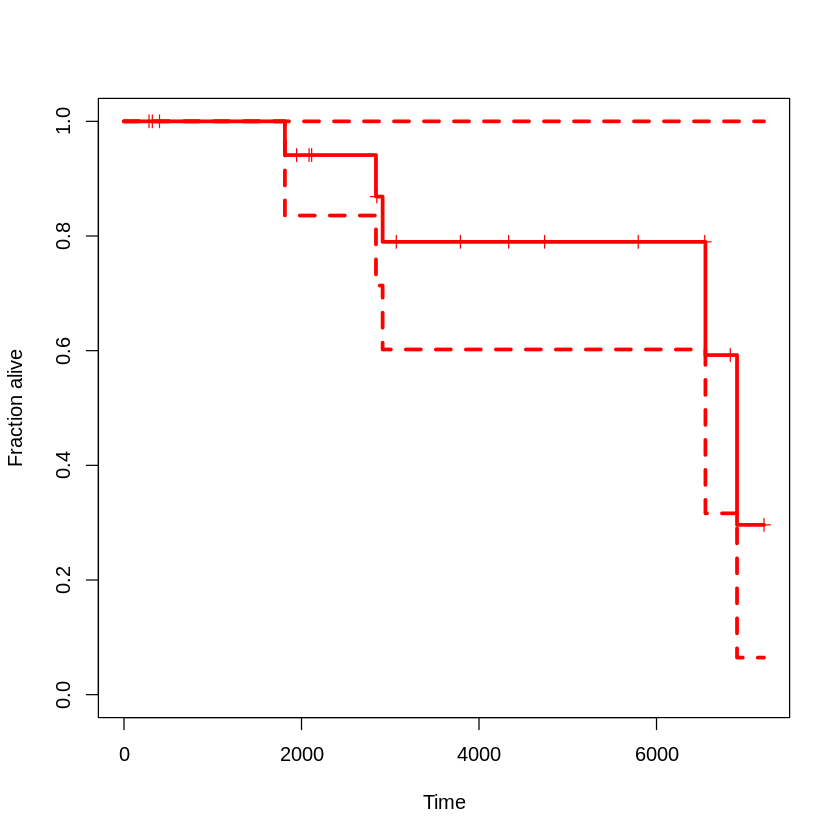

In [38]:
plot(survfit(Surv(survdays,dflag) ~ 1, minicf), mark.time=T, lwd=3, col=c("red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)


5단계가 있다는 것은 event가 5회 있었다는 것.


### What's good about mssa?(Hypothesis)
1. Fight off pseudo
2. MSSA modulate immune system better.
3. Marker of better condition.

#### Look at relationship between them
1. snapshots
2. 시간 순서대로 mssa, pseudo colonization을 보는 것
3. lung damage를 보는 것

In [82]:
cffirst$fev1pct

[1]  91.20 115.50  86.59  88.93  60.91 154.70  99.10  25.14  25.38  92.16
  [11]  95.24  97.48  96.07  68.72 128.80 160.20  64.28  35.53  51.41  98.87
  [21] 127.30  99.59 117.30 104.40 123.30 110.80 107.20  44.75  55.81  92.29
  [31]  96.96  49.06 110.60  94.10 114.50  92.89  92.96  62.49 149.00  50.80
  [41] 111.40  57.65 103.80  50.19  44.65  78.78  79.70 134.90  80.49 133.00
  [51]  68.50 125.00  99.72 115.80 158.80  65.75 129.60 134.40  60.04  34.71
  [61]  98.77  29.63  45.08  97.12  76.80  42.98  87.86 116.60 154.50  44.19
  [71]  96.01 113.00  33.06  81.25  87.10  99.74 145.20  95.39  69.56  45.73
  [81] 102.40  49.85 129.90  97.26  41.87  58.94  96.39 114.10  96.84 106.90
  [91] 121.20 103.10  96.37  94.80  32.31  80.42 100.20  38.14  62.96  22.07
 [101] 133.60  93.78  87.15  79.19 125.80 184.60  72.11  94.93 113.00 119.70
 [111]  79.14  62.83  60.03  78.40 150.50  60.03  81.35  66.28  79.64  94.34
 [121] 118.60  82.40 103.40  55.00  88.79  34.49  88.98 140.20 176.00  60.32
 [131]  55.77 136.40  56.38  67.36 112.70 101.70 105.80 105.80 141.60 101.00
 [141]  73.15  79.47 114.50 113.30 126.30 106.90 112.90 107.00  59.82  82.81
 [151]  94.87  96.35 156.00  37.50  61.96 139.70  90.39  44.10  67.82  41.63
 [161]  73.04  37.70 103.50 118.40  68.24 101.70 110.30 178.60 124.60  61.92
 [171]  50.49  98.42 114.50  93.19  80.66  36.01 137.40 105.50 105.80  38.79
 [181] 112.30  92.61 107.90  98.80 158.70 106.30  54.48  69.70 145.00 115.90
 [191]  27.75  96.96 129.90  18.78 100.60  11.63  86.16  55.12  45.91 117.00
 [201] 107.30 102.60  31.70 125.40  97.38  95.46  18.68  79.35  47.64  77.93
 [211]  85.14 118.50 143.90  31.84 108.70  83.27  51.96  90.71  48.70 109.80
 [221] 123.20  60.69 121.20 101.50  59.73  93.52  36.95  83.89  75.38  99.11
 [231]  85.40 149.50  66.47  34.51  99.75 117.10  87.04 145.10  59.62  79.76
 [241]  59.99 148.60  89.53  71.15  47.23 123.10  82.79  97.01  91.77  97.44
 [251]  80.36  78.68 112.70  88.51 112.40  54.93 110.70  77.68  84.88  65.24
 [261] 121.90  31.94 104.80  89.52  17.37  74.42  25.96  91.01  65.42  80.67
 [271]  89.03  70.99 124.20  77.73  65.56  50.61  79.45  90.38  57.11 116.60
 [281]  18.16  39.44  38.03  99.30 123.20  42.85 102.20  79.77  37.31  89.90
 [291]  75.42  94.28 110.50 118.70  71.05  88.99  91.39 100.80  76.15  59.66
 [301]  37.62  98.68  59.56  86.77  94.22  91.31  78.06  98.83  79.75  88.06
 [311]  76.52 118.10  71.97 116.20  23.09 126.50 101.50  86.66  79.81  99.63
 [321]  83.76  47.92  75.75 113.30 119.80  56.98 132.20 122.30  90.12 111.00
 [331]  93.79  46.50  97.65  88.54  34.31  73.16 117.90  88.00  97.73  84.46
 [341]  95.42 137.40 114.20  75.40  28.42  94.97  85.70 109.60 116.70 117.10
 [351]  55.72  48.94  99.40 101.50  85.15  71.89  60.65  66.09  64.51  78.27
 [361]  65.05  50.47  92.77 112.00  94.89  86.19  81.15 120.20  77.26  94.68
 [371] 107.50  51.07  98.96  54.75 110.30 111.10  19.50  29.19 111.20  88.82
 [381] 123.60  91.63  74.08 143.30  81.66  58.59 112.50  82.08  92.58  64.20
 [391] 192.90 152.90  22.61  39.89  66.59  93.18 118.00 157.80  83.06  98.84
 [401]  44.57 164.10  76.84  78.64  31.23  85.43  49.13  27.77  65.25  17.20
 [411] 100.60  52.82  50.07  76.74  79.71 114.00  89.23  36.05 107.70 105.50
 [421] 101.30  56.50  92.86 142.70  60.64  60.29 180.90  26.24 118.30 125.50
 [431]  97.92  55.87 135.40 105.60  43.44  25.35  70.20  56.24  42.51  97.55
 [441]  80.52 107.00 153.70 101.60  53.94 100.10  75.56 122.80  69.68 103.90
 [451]  64.51 110.80 108.80 133.90  81.88  63.59  65.58  94.94 130.60 104.00
 [461]  73.87 139.40  57.01  91.98  65.66 112.90  68.89 111.60  79.97 136.40
 [471]  99.35  52.95  35.20  62.34 104.50  89.22  70.03  35.92  94.07  93.21
 [481] 102.20  97.57  13.30 133.40  29.08  86.86 132.80  31.12  95.29 118.20
 [491]  89.79  78.53  78.57 141.40  63.59  87.14  69.41  96.91  83.93 126.70
 [501]  79.75  46.75  84.66  74.06  35.89  98.24  80.48  26.55  71.31 111.90
 [511] 122.60  75.09 100.40  62.58 104.40  81.24 100.70  83.76  51.03 121.60

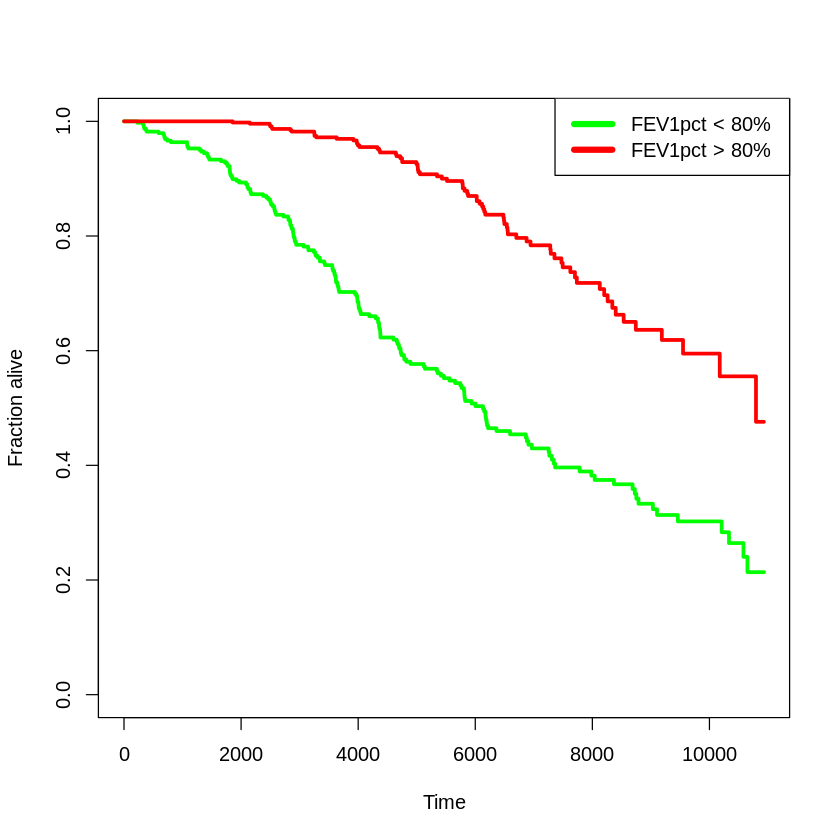

In [79]:

plot(survfit(Surv(survdays,dflag) ~ (fev1pct > 80), cffirst), lwd=3, col=c("green", "red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
legend("topright",c("FEV1pct < 80%","FEV1pct > 80%"), lwd=5, col = c("green", "red"))

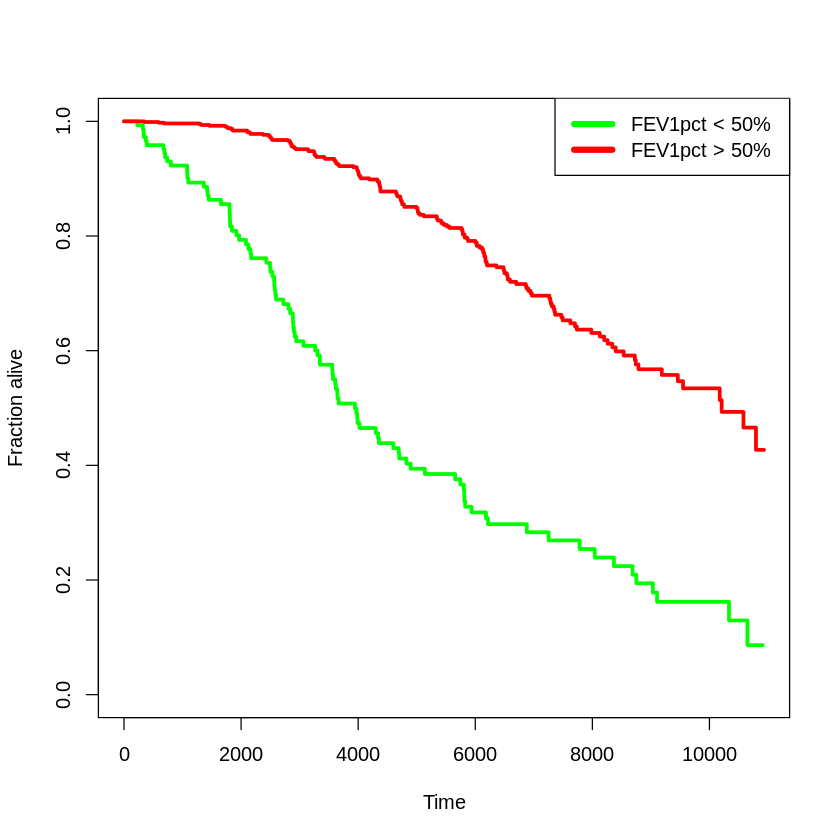

In [80]:
plot(survfit(Surv(survdays,dflag) ~ (fev1pct > 50), cffirst), lwd=3, col=c("green", "red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
legend("topright",c("FEV1pct < 50%","FEV1pct > 50%"), lwd=5, col = c("green", "red"))

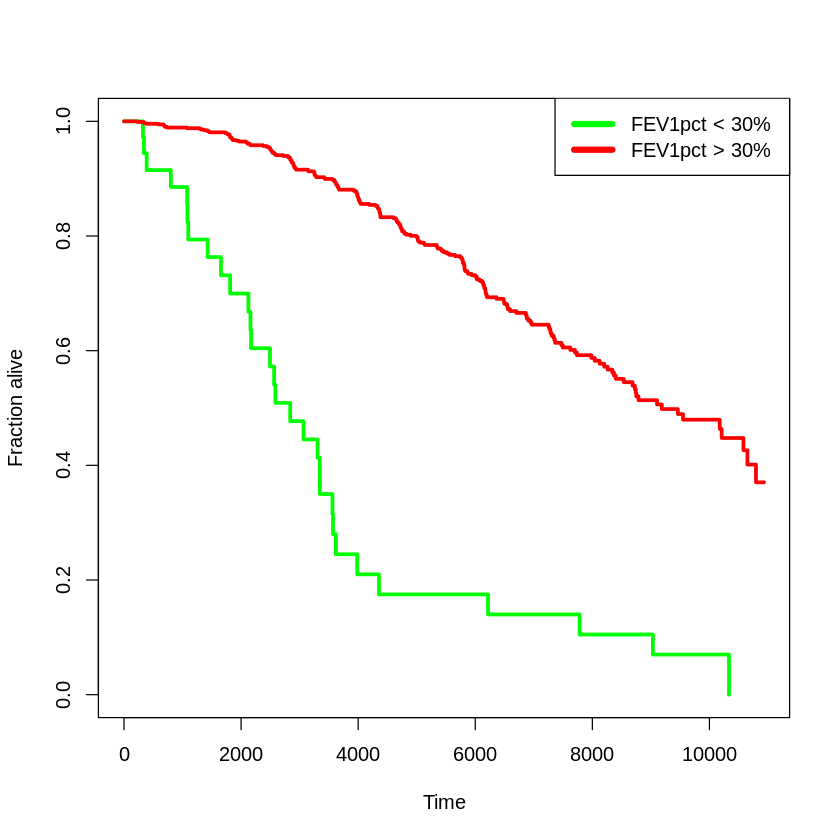

In [81]:
plot(survfit(Surv(survdays,dflag) ~ (fev1pct > 30), cffirst), lwd=3, col=c("green", "red"), xlab="Time", ylab="Fraction alive", cex.axis=1, cex.lab=1)
legend("topright",c("FEV1pct < 30%","FEV1pct > 30%"), lwd=5, col = c("green", "red"))

* pseudomonas → loss fev1
* loss fev1 → pseudomonas

In [85]:
cfnext <- read.csv("./Data/cfnext.csv")

In [90]:
head(cfnext)

id,YRM,age,sex,fev1pct,pseudo,mssa,jedate,jlastdate,jddate,dflag1yr,dflag5yr,survdays,dflag,nextage,nextfev1pct,nextpseudo,nextmssa,deltafev1pct
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
123462,2010,10,0,91.20,0,0,18508,20453,NA,0,0,1945,0,11,88.32,0,0,-2.88
123462,2011,11,0,88.32,0,0,18704,20453,NA,0,0,1749,0,12,87.89,0,1,-0.43
123462,2012,12,0,87.89,0,1,19019,20453,NA,0,0,1434,0,13,92.94,0,1,5.05
123462,2013,13,0,92.94,0,1,19446,20453,NA,0,0,1007,0,14,85.19,0,1,-7.75
123462,2014,14,0,85.19,0,1,19782,20453,NA,0,0,671,0,15,72.92,0,0,-12.27
123462,2015,15,0,72.92,0,0,20189,20453,NA,0,0,264,0,NA,NA,NA,NA,NA


## add a column

In [88]:

cfnext$deltafev1pct = cfnext$nextfev1pct - cfnext$fev1pct

In [89]:
head(cfnext)

id,YRM,age,sex,fev1pct,pseudo,mssa,jedate,jlastdate,jddate,dflag1yr,dflag5yr,survdays,dflag,nextage,nextfev1pct,nextpseudo,nextmssa,deltafev1pct
<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
123462,2010,10,0,91.20,0,0,18508,20453,NA,0,0,1945,0,11,88.32,0,0,-2.88
123462,2011,11,0,88.32,0,0,18704,20453,NA,0,0,1749,0,12,87.89,0,1,-0.43
123462,2012,12,0,87.89,0,1,19019,20453,NA,0,0,1434,0,13,92.94,0,1,5.05
123462,2013,13,0,92.94,0,1,19446,20453,NA,0,0,1007,0,14,85.19,0,1,-7.75
123462,2014,14,0,85.19,0,1,19782,20453,NA,0,0,671,0,15,72.92,0,0,-12.27
123462,2015,15,0,72.92,0,0,20189,20453,NA,0,0,264,0,NA,NA,NA,NA,NA


In [91]:
summary(cfnext)

       id              YRM            age            sex      
 Min.   :123462   Min.   :1986   Min.   : 3.5   Min.   :0.00  
 1st Qu.:136414   1st Qu.:1999   1st Qu.:12.0   1st Qu.:0.00  
 Median :147224   Median :2005   Median :18.0   Median :0.00  
 Mean   :147795   Mean   :2004   Mean   :20.2   Mean   :0.47  
 3rd Qu.:160055   3rd Qu.:2011   3rd Qu.:26.0   3rd Qu.:1.00  
 Max.   :172334   Max.   :2015   Max.   :73.0   Max.   :1.00  
                                                              
    fev1pct            pseudo            mssa            jedate     
 Min.   :  6.235   Min.   :0.0000   Min.   :0.0000   Min.   : 9461  
 1st Qu.: 52.870   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:14230  
 Median : 76.970   Median :1.0000   Median :0.0000   Median :16510  
 Mean   : 74.058   Mean   :0.5859   Mean   :0.4206   Mean   :16178  
 3rd Qu.: 94.130   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:18616  
 Max.   :194.400   Max.   :1.0000   Max.   :1.0000   Max.   :20434  
 NA's   :2804

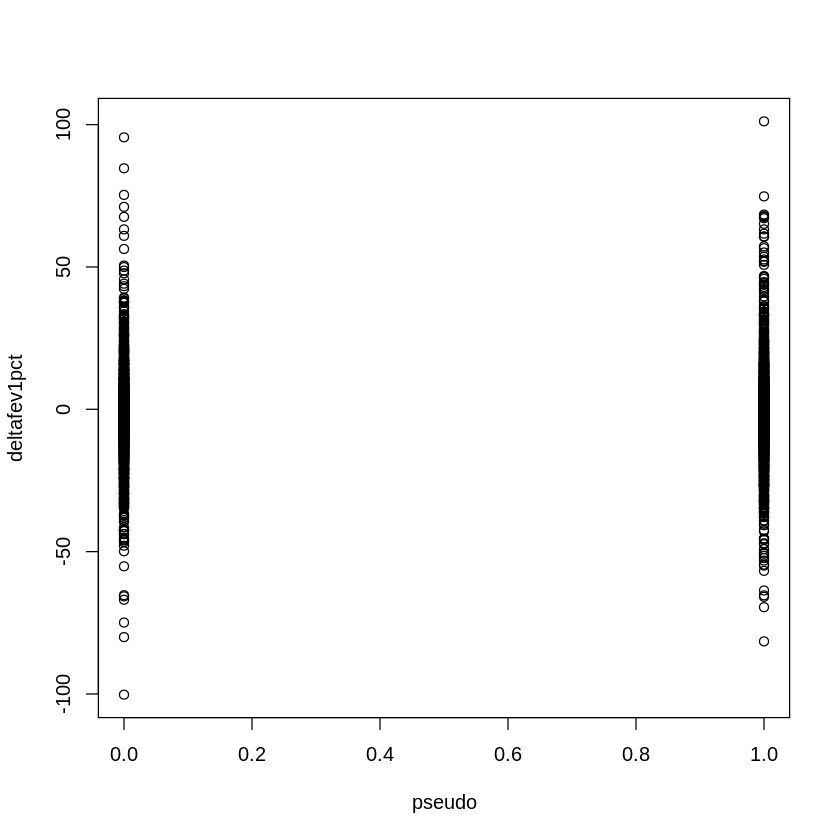

In [97]:
plot(deltafev1pct~pseudo, cfnext)
## it is terrible

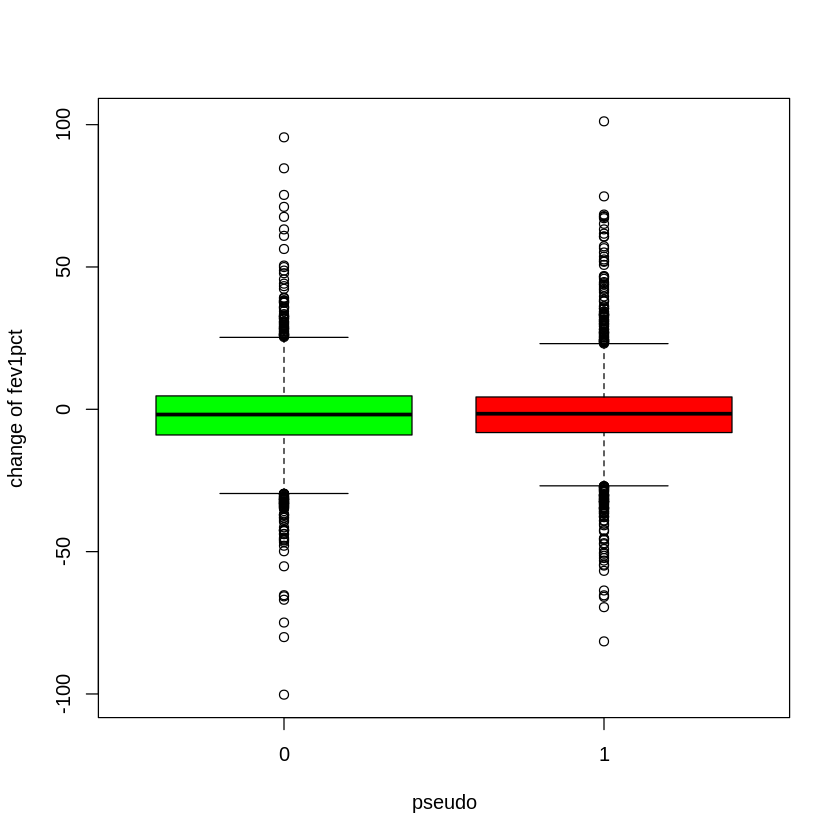

In [98]:
plot(as.factor(cfnext$pseudo), cfnext$deltafev1pct,
    col = c("green", "red"),
    xlab ="pseudo", ylab = "change of fev1pct")
## it isn't that much better

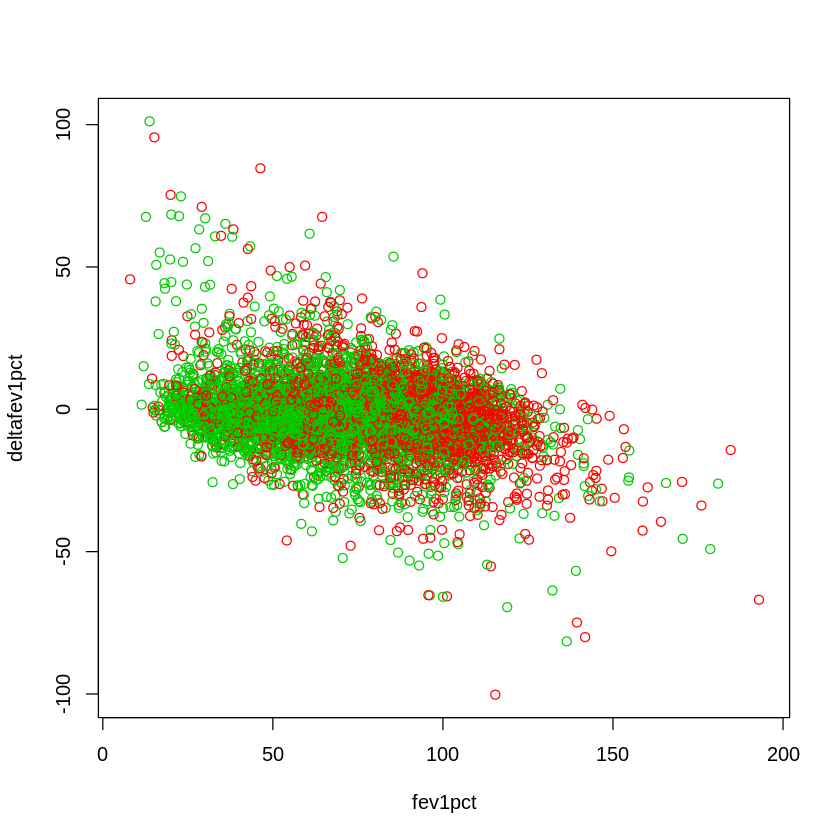

In [102]:
plot(deltafev1pct ~ fev1pct, cfnext,
    col = pseudo+2, 
    xlab ="fev1pct", ylab = "deltafev1pct")
## it isn't that much better

In [103]:
## This is ncfnext$deltafev1pct = cfnext$nextfev1pct - cfnext$fev1pctot helping. Let's take a look at how change in pseudo.
cfnext$deltapseudo = cfnext$nextpseudo - cfnext$pseudo

In [104]:
summary(cfnext)

       id              YRM            age            sex      
 Min.   :123462   Min.   :1986   Min.   : 3.5   Min.   :0.00  
 1st Qu.:136414   1st Qu.:1999   1st Qu.:12.0   1st Qu.:0.00  
 Median :147224   Median :2005   Median :18.0   Median :0.00  
 Mean   :147795   Mean   :2004   Mean   :20.2   Mean   :0.47  
 3rd Qu.:160055   3rd Qu.:2011   3rd Qu.:26.0   3rd Qu.:1.00  
 Max.   :172334   Max.   :2015   Max.   :73.0   Max.   :1.00  
                                                              
    fev1pct            pseudo            mssa            jedate     
 Min.   :  6.235   Min.   :0.0000   Min.   :0.0000   Min.   : 9461  
 1st Qu.: 52.870   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:14230  
 Median : 76.970   Median :1.0000   Median :0.0000   Median :16510  
 Mean   : 74.058   Mean   :0.5859   Mean   :0.4206   Mean   :16178  
 3rd Qu.: 94.130   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:18616  
 Max.   :194.400   Max.   :1.0000   Max.   :1.0000   Max.   :20434  
 NA's   :2804

In [105]:
table(cfnext$deltapseudo)


  -1    0    1 
 872 8001  983 

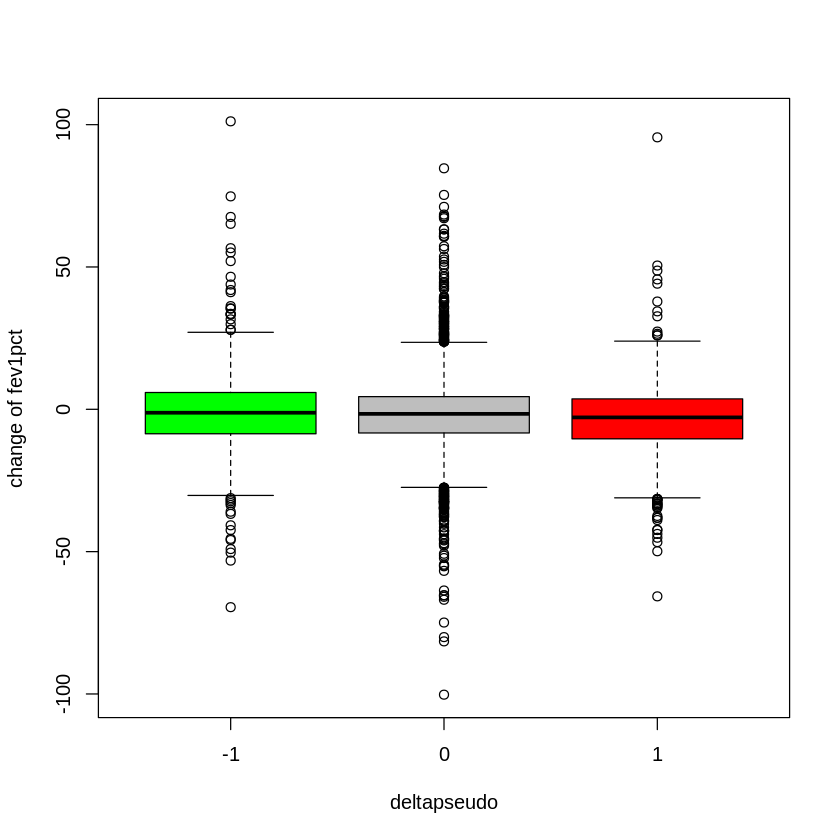

In [108]:
## We see that most people's status didn't change, but a few more acquired the infection than lost it.
plot(deltafev1pct~as.factor(deltapseudo),cfnext,
    col = c("green","grey", "red"),
    xlab ="deltapseudo", ylab = "change of fev1pct")

In [109]:
## Hmm, this looks like those who gain pseudo also lose most fev1pct
## skiptics don't believe this, so we'll do some statitics.

summary(lm(deltafev1pct ~ as.factor(deltapseudo), cfnext))



Call:
lm(formula = deltafev1pct ~ as.factor(deltapseudo), data = cfnext)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.512  -6.667   0.182   6.338 102.082 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.9118     0.5789  -1.575 0.115299    
as.factor(deltapseudo)0  -0.8263     0.6095  -1.356 0.175211    
as.factor(deltapseudo)1  -2.6601     0.7884  -3.374 0.000746 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.26 on 5980 degrees of freedom
  (5339 observations deleted due to missingness)
Multiple R-squared:  0.002222,	Adjusted R-squared:  0.001888 
F-statistic: 6.659 on 2 and 5980 DF,  p-value: 0.001292


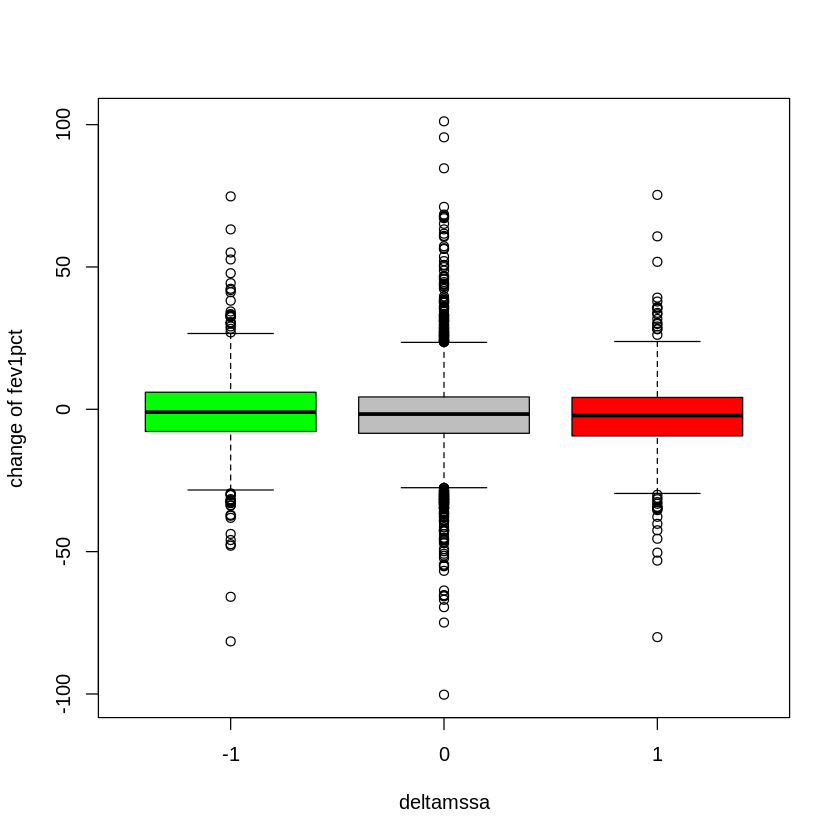

In [110]:
## This looks pretty convincing -- people who gains pseudomonoas are also most likely to lose more fev1pct.
cfnext$deltamssa = cfnext$nextmssa - cfnext$mssa
plot(deltafev1pct~as.factor(deltamssa),cfnext,
    col = c("green","grey", "red"),
    xlab ="deltamssa", ylab = "change of fev1pct")

In [111]:
summary(lm(deltafev1pct~as.factor(deltamssa),cfnext))


Call:
lm(formula = deltafev1pct ~ as.factor(deltamssa), data = cfnext)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.372  -6.597   0.208   6.364 103.048 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)            -1.0698     0.4910  -2.179   0.0294 *
as.factor(deltamssa)0  -0.8077     0.5288  -1.527   0.1267  
as.factor(deltamssa)1  -1.4562     0.7043  -2.068   0.0387 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.27 on 5980 degrees of freedom
  (5339 observations deleted due to missingness)
Multiple R-squared:  0.0007247,	Adjusted R-squared:  0.0003905 
F-statistic: 2.168 on 2 and 5980 DF,  p-value: 0.1144


In [112]:
## kind of paralls pseudo result, but less strong.

In [113]:
table(cfnext$pseudo, cfnext$mssa)

   
       0    1
  0 2370 2319
  1 4190 2443

In [114]:
###     mssa
#      0    1
#  0 2370 2319
#  1 4190 2443

In [115]:
table(cfnext$deltapseudo, cfnext$mssa)

    
        0    1
  -1  435  437
  0  4658 3343
  1   569  414

In [ ]:
## this does indicate that people who have staph
#        0    1
#  -1  435  437
#  0  4658 3343
#  1   569  414